# Advertising Sales Channel Prediction



## importing libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore
import pickle
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:

df= pd.read_csv(r"C:\Users\INTEL\Desktop\Projects\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data is loaded we can see 5 columns but we don't need 1st column as that column has no use. So we can drop it.

In [3]:
#dropping first column as we don't need them
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#checking dimensions of the dataset
df.shape

(200, 4)

In the given dataset there are 200 rows and four columns.

In [5]:
# Checking the datatypes of the columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All columns have float datatype.

In [6]:
#to know null values, datatypes, columns, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


No null values and 200 entries in the dataset.

In [7]:
#statistical summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#to check 0 values
(df == 0).sum(axis=0)

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

We can see radio features have one 0 value.

## Data Cleaning:

In [9]:
#to check missing values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

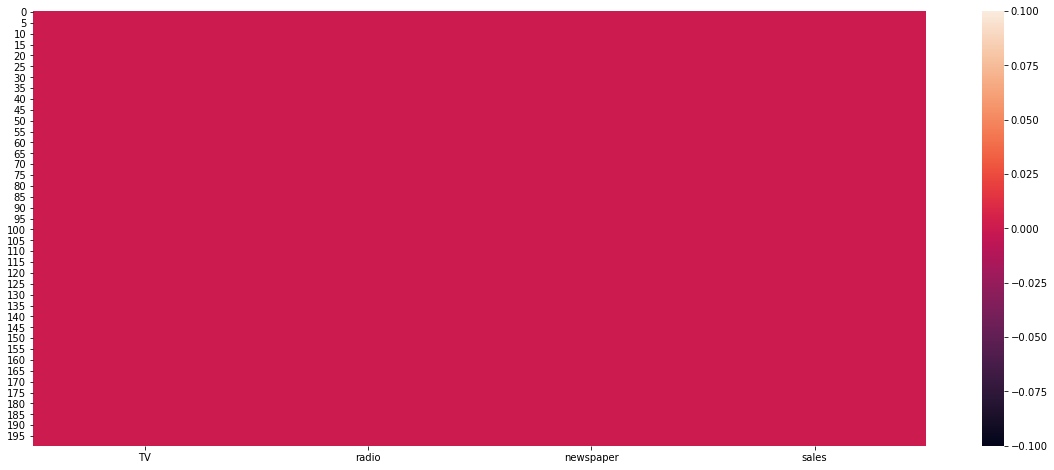

In [10]:
#another way to check missing values
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

sales is our target variable so we need to know more about it.

In [11]:
#check sales column by value_counts methods
df.sales.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

## EDA:

In [12]:
#to know correlation of the dataset
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


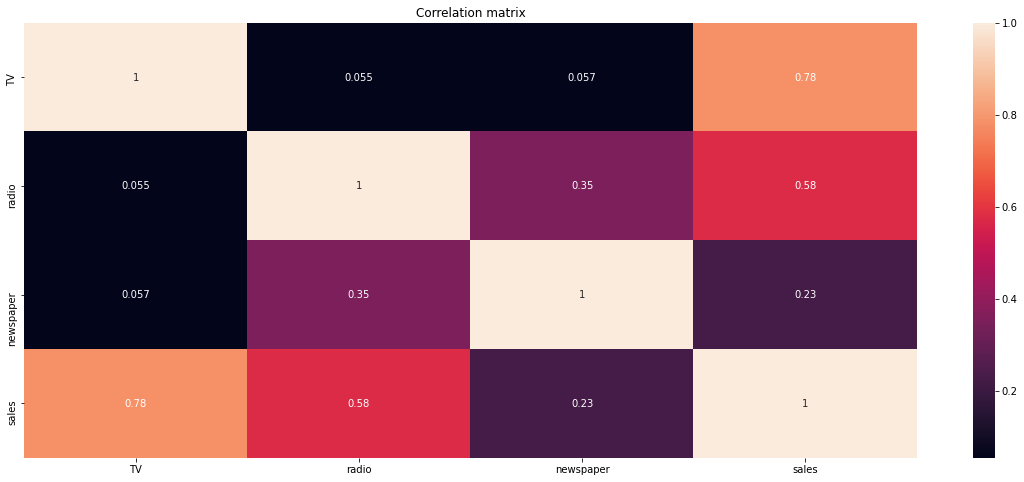

In [13]:
plt.figure(figsize=(20,8))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot=True)      #visualizing correlation by using heatmap
plt.show()

### Pairplot:

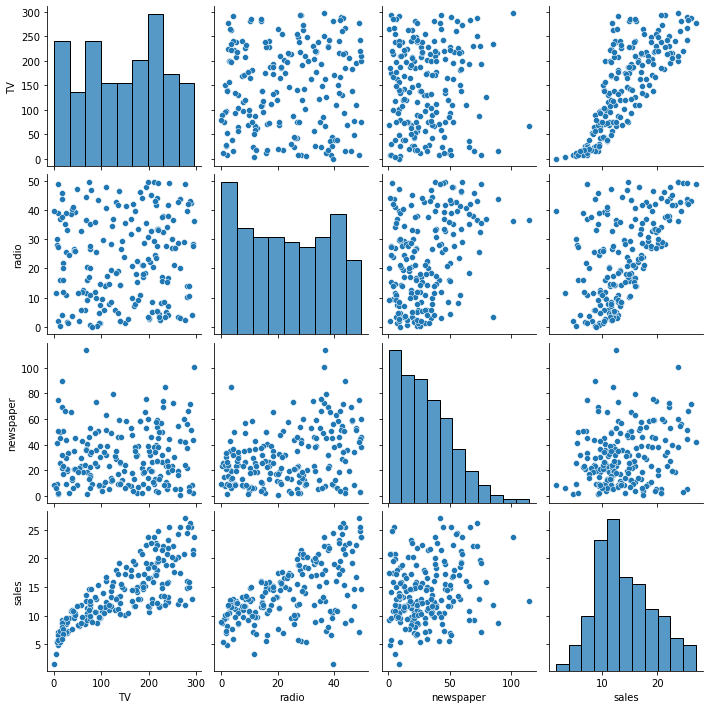

In [14]:
sns.pairplot(df)

#### Univariate analysis--sales (target variable)

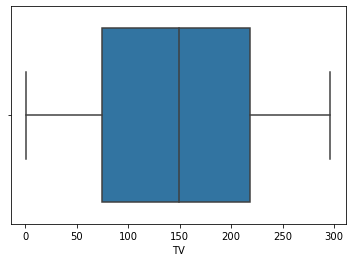

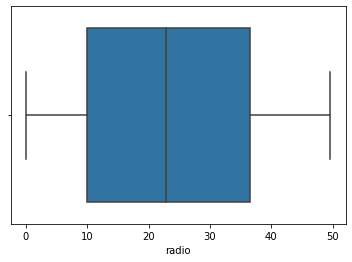

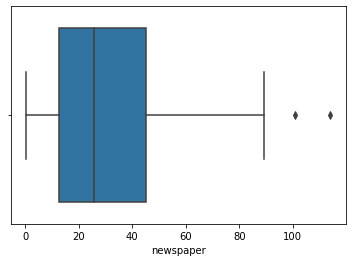

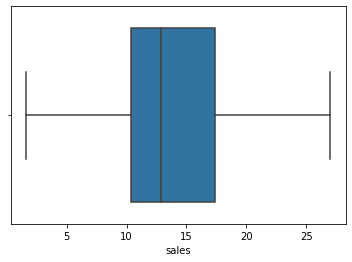

In [15]:
#visualisation with boxplot to see outliers
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

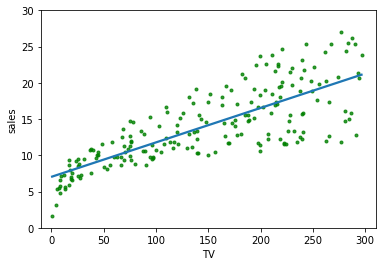

In [17]:
#comparison between target variable and feature
sns.regplot(df.TV, df.sales, order=1, ci=None, scatter_kws={'color':'g', 's':9})
plt.xlim(-10,310)                                                                 
plt.ylim(0,30)
plt.show()

<AxesSubplot:xlabel='TV', ylabel='sales'>

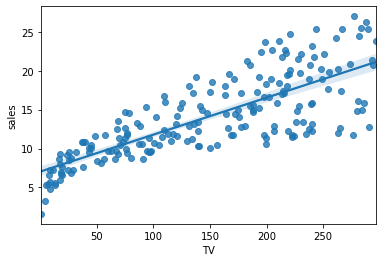

In [18]:
sns.regplot(x='TV', y='sales', data=df)                #bivariate analysis

<AxesSubplot:xlabel='radio', ylabel='sales'>

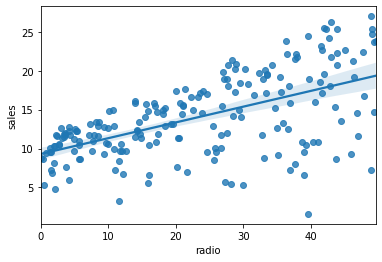

In [19]:
sns.regplot(x='radio', y='sales', data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

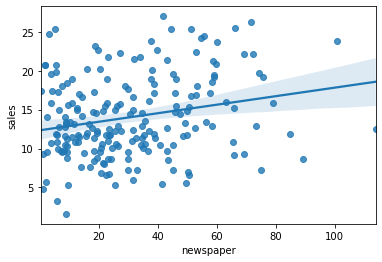

In [20]:
sns.regplot(x='newspaper', y='sales', data=df)

### Model Building:

In [21]:
X = df['TV']
y = df['sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
         test_size = 0.3, random_state = 100)

In [23]:
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


In [24]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [25]:
print(X_train.shape)
print(X_test.shape)

(140, 1)
(60, 1)


In [26]:
print(X_test.shape)
print(y_test.shape)

(60, 1)
(60,)


In [27]:
reg = LinearRegression()


reg.fit(X_train,y_train) 

LinearRegression()

In [28]:
reg.score(X_train,y_train) 

0.6134312469429993

In [29]:
reg.coef_

array([0.04649736])

In [30]:
reg.intercept_

6.989665857411681

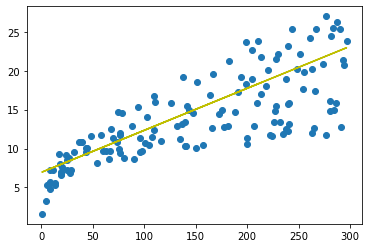

In [31]:
#visualise x_train, y_train by scatter plot
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'y')
plt.show()

In [32]:
y_train_pred = reg.predict(X_train)
print(y_train_pred[0:5])
print(y_train[0:5])
res = (y_train - y_train_pred)
print(res[0:5])

[16.91220221 14.03401571 16.5216244  13.63413842 13.23426114]
74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64
74     0.087798
3      4.465984
185    6.078376
26     1.365862
90    -2.034261
Name: sales, dtype: float64


## Model evaluation:

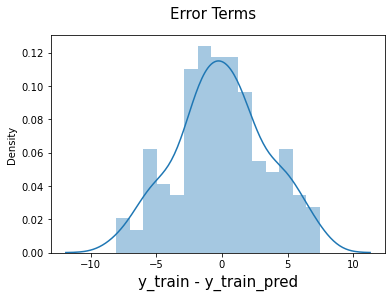

In [33]:
#visualise prediction using distribution plot
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)    
plt.xlabel('y_train - y_train_pred', fontsize = 15) 
plt.show()

#### Predictions of the set:

In [34]:
y_pred = reg.predict(X_test)

print(y_test[0:5])
print(y_pred[0:5])

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: sales, dtype: float64
[ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747]


In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327007

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783302

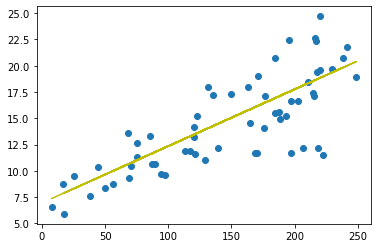

In [37]:
#visualisation of x_test, y_test by scatter plot
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'y')
plt.show()

### Saving the data:

In [38]:
filename ="Advertising Sales Prediction.pkl"  #saving the model as a pickle
pickle.dump(y_pred, open(filename, 'wb')) 